<h2> Name: Christian Grier

In [21]:
from pathlib import Path
import math
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpat
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score, roc_curve, auc
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
DATA = Path("C:/Users/chris/Documents/DS 110-DM/data")

<h3> Question 1

Confusion Matrix  <br>
Actual       Predicted   <br>
          1        0    <br>
1         30       58   <br>
0         32       920


Overall Error:
(58+32)/1040 = .0865 or 8.65%

<h3> Question 2.a
   

If the cutoff for the classification error rate for records that are truely fraudulent could be moved up then we would see an increase in the error rate because non-fradulent records would decrease. If we could do the opposite and lower the cutoff then the opposite would occur with error rate decreasing and fradulent records would increase.

<h3> Question 2.b

If the cutoff for the classication error rate of records that are truely non-fraudulent could be moved up then we would see a decrease in the fraudulent records as well as a decrease in the error rate. 

<h3> Question 3

So this is what I found after doing some digging on US Congressional Bills. On average each congressional cycle (2-years) there is  on average 2-3% of billed enacted into law. This means that each two year period sees roughly 10,000-16,000 bills introduced and only 300-400 get passed each cycle. Some misclassifications that we could encounter with this is that the bill can be registered to different groups of legislature (House or Senate) but it is voted on by both. Parties can also play a role in this as there are different political parties with different agendas. This means that although they are different groups they could be needing the same bill to pass. 

<h3> Question 4.a

The first two bars on the left represent two of the most probably or highest propensity 1's. In our case. The bar furthest to the left shows that we are 6 times more likely to recieve 1's in our data compared to a random sample. The second bar represents a slightly higher than 2 time more likely when compared to a random sample. 

<h3> Question 4.b

In practice if we choose the first 10% that would provide us with a slighly higher than 6 time more fraudulent records compared to a random sample of 10%.

<h3> Question 4.c

If we recalculate the error rate after adjusting everything to being non-fraudulent then we would have an error rate of 5.96. This is calculated as 100*(62+0)/1040 = 5.96%

<h3> Question 4.d

From my understanding, the error rate represents the error of the entire dataset where as the lift chart represents a specific part of the data. In our case the lift chart hold more benefit because we are looking for specific transactions that will work well for us. 

<h3> Question 5.a

Confusion Matrix<br>
Actual     Predicted  Total<br>
        1       0<br>
1      310      90     400<br>
0      130     270     400<br>
Total  440     360     800

<h3> Question 5.b

Both fradulent and non-fraudulent equal totals of 400. Since the percentage of fraudulent was explained as 1% over a sample of 800 we can divide fruadulent by (.01*800) and non-fraudulent by (.99*800). This will equal misclassification rates of 400/8 = 50 and 400/792 = .5050

Looking further we can look at the adjusted Confusion matrix

Adjusted Confusion Matrix<br>
Actual     Predicted   Total<br>
        1       0<br>
1      6.2     1.8       8<br>
0      257.4   534.6   792<br>
Total                  800

<h3> Question 5.c

I would expect 1% to be fruadulent.

<h3> Question 6.a

I was not really sure how to calulate profits. From how I read the question I would assume that the global mean value is 2500 and since the cost is 2500 it would equal profits of 0.

<h3> Question 6.b

If the company wants to average a 2x profit the company should use the 1st decile as the remainder fall below 2x.

<h3> Question 6.c

Falls back on part(a) where I wasnt sure what the original cutoff was. 

<h3> Question 6.d

We use this two-stage process for predicting sales instead of developing a model because we can create a more accurate prediction rather than simply developing a model for the new leads. 

<h3> Question 7.a

In [22]:
df = pd.read_csv('Question7data.csv')
print(df.dtypes)
class_names = ['0', '1']

Probability    float64
Class           object
dtype: object


In [23]:
predicted = ['Yes' if p> 0.25 else 'No' for p in df.Probability]
classificationSummary(df.Class, predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 9 8
     1 0 3


<h5> At .25 cutoff   <br>
error: 8/20 = .40   <br>
sensitivity: 9/(9+8) = .529   <br>
specificity: 3/(3) = 1 

In [24]:
predicted = ['Yes' if p> 0.50 else 'No' for p in df.Probability]
classificationSummary(df.Class, predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.9000)

       Prediction
Actual  0  1
     0 15  2
     1  0  3


<h5>At .50 cutoff   <br>
error: 2/20 = .10   <br>
sensitivity: 15/(15+2) = .882   <br>
specificity: 3/3 = 1

In [25]:
predicted = ['Yes' if p> 0.75 else 'No' for p in df.Probability]
classificationSummary(df.Class, predicted, class_names=class_names)

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1
     0 17  0
     1  1  2


<h5>At .75 cutoof   <br>
error: 1/20 = .05   <br>
sensitivity: 17/17 = 1    <br>
specificity: 2/3 = .67

<h3> Question 7.b

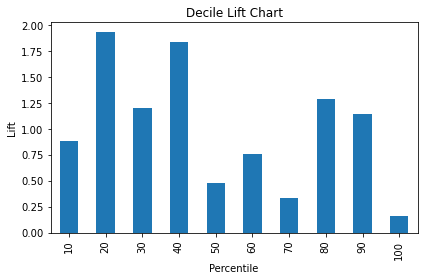

In [26]:
liftChart(df.Probability, labelBars=False)
plt.tight_layout()
plt.show()